

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 24s 0us/step


### 2. Visualize the First 24 Training Images

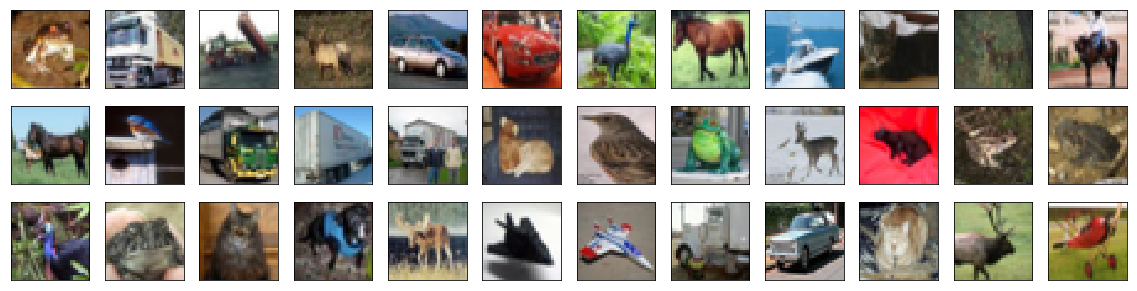

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [3]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.intra_op_parallelism_threads = 0
config.inter_op_parallelism_threads = 0
set_session(tf.Session(config=config))


### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [4]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [5]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [162]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, BatchNormalization

model = Sequential()
#model.add(Conv2D(filters=8, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
#model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16, kernel_size=2, padding='same', input_shape=(32, 32, 3)))
model.add(LeakyReLU(alpha=0.25))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=16, kernel_size=2, padding='same'))
model.add(LeakyReLU(alpha=0.25))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same'))
model.add(LeakyReLU(alpha=0.25))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same'))
model.add(LeakyReLU(alpha=0.25))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=2, padding='same'))
model.add(LeakyReLU(alpha=0.25))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.4))
model.add(Conv2D(filters=64, kernel_size=2, padding='same'))
model.add(LeakyReLU(alpha=0.25))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128, kernel_size=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
#model.add(MaxPooling2D(pool_size=2))
#model.add(Dropout(0.4))
model.add(Conv2D(filters=128, kernel_size=2, padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))

#model.add(Dropout(0.3))
model.add(Flatten())
#model.add(Dense(256))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.4))
#model.add(Dense(128))
#model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 32, 32, 16)        208       
_________________________________________________________________
leaky_re_lu_135 (LeakyReLU)  (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 32, 32, 16)        1040      
_________________________________________________________________
leaky_re_lu_136 (LeakyReLU)  (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_137 (MaxPoolin (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_76 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 16, 16, 32)        2080      
__________

### 6. Compile the Model 

In [163]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 7. Train the Model 

In [164]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
early_stop = EarlyStopping(patience=10)

hist = model.fit(x_train, y_train, batch_size=64, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=0, shuffle=True)


Epoch 00001: val_loss improved from inf to 1.84981, saving model to model.weights.best.hdf5

Epoch 00002: val_loss improved from 1.84981 to 1.39401, saving model to model.weights.best.hdf5

Epoch 00003: val_loss improved from 1.39401 to 1.36967, saving model to model.weights.best.hdf5

Epoch 00004: val_loss did not improve from 1.36967

Epoch 00005: val_loss did not improve from 1.36967

Epoch 00006: val_loss improved from 1.36967 to 1.19467, saving model to model.weights.best.hdf5

Epoch 00007: val_loss improved from 1.19467 to 1.00178, saving model to model.weights.best.hdf5

Epoch 00008: val_loss did not improve from 1.00178

Epoch 00009: val_loss improved from 1.00178 to 0.96257, saving model to model.weights.best.hdf5

Epoch 00010: val_loss improved from 0.96257 to 0.91017, saving model to model.weights.best.hdf5

Epoch 00011: val_loss did not improve from 0.91017

Epoch 00012: val_loss did not improve from 0.91017

Epoch 00013: val_loss improved from 0.91017 to 0.87567, saving m

### 8. Load the Model with the Best Validation Accuracy

In [165]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [166]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7966


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [167]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

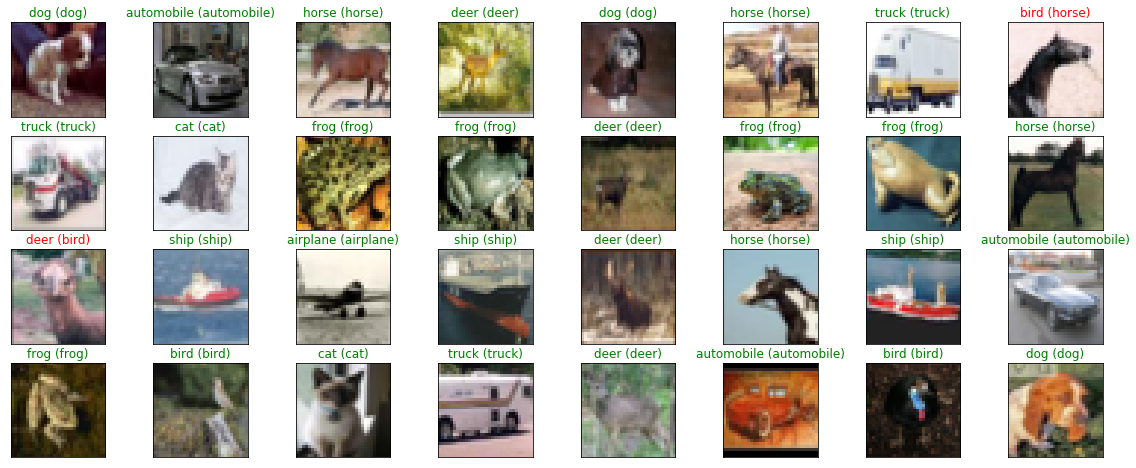

In [168]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))